<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مبانی بینایی 3 بعدی (پاییز 1402)
        </font>
		<p></p>
        <h1 style="text-align: center">
        تمرین اول - بخش عملی
        </h1>
		<h2 style="text-align: center">
        نام و نام خانوادگی: امیررضا آذری 
		<br>
		شماره دانشجویی: 99101087 
		<br>
		</h2>		 
		</h3>
            
  

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;" dir="rtl">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 1
        </font>
		<p></p>
		<hr>
       الف- ماتریس زیر را در نظر بگیرید، با استفاده از کتابخانه‌های موجود یک 2D DFT بر روی آن اعمال کنید و به فضای فرکانس ببرید و نتیجه را چاپ نمایید.
	   <br>
	</font>
</div>

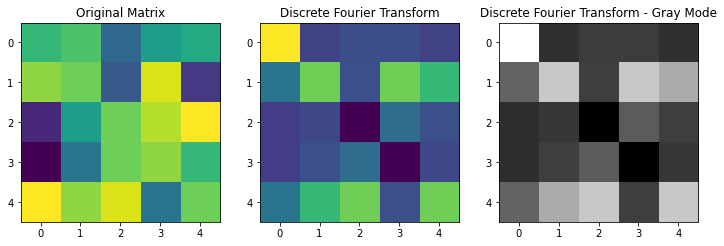

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



matrix = np.array([[3,4,-3,1,2],
              [6,5,-4,8,-6],
              [-7,1,5,7,9],
              [-9,-2,5,6,3],
              [9,6,8,-2,5]])


dft_matrix = np.fft.fft2(matrix)


plt.figure(figsize=(25, 25))
plt.subplot(161),plt.imshow(matrix)
plt.title('Original Matrix')
plt.subplot(162),plt.imshow(dft_matrix.real)
plt.title('Discrete Fourier Transform')
plt.subplot(163),plt.imshow(dft_matrix.real, cmap='gray')
plt.title('Discrete Fourier Transform - Gray Mode')
plt.show()

<div style="direction:rtl;line-height:300%;" dir="rtl">
	<font face="XB Zar" size=5>
       ب- بدون استفاده از کتابخانه‌های آماده خودتان تابع تبدیل فوریه را بنویسید و تصویر 1.jpg را به فضای فوریه ببرید و نتیجه را چاپ کنید.
</font> 
</div>

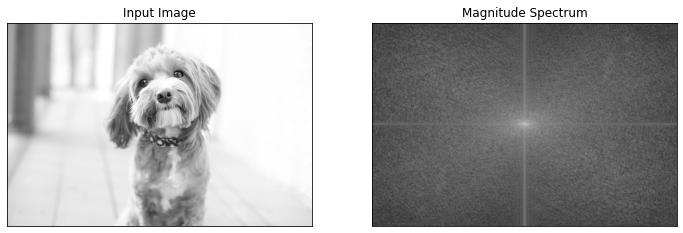

In [2]:
img = cv2.imread(r'1.jpg', 0)

def dft1d(pix):
    length = len(pix)
    narr = np.arange(length)
    k = narr.reshape((length, 1))
    base = np.pi * (narr)
    complement = base * (narr.reshape((length, 1)))
    complex_form = -2j * complement
    e = np.exp(complex_form / length)
    return np.dot(e, pix)


fft_rows = np.apply_along_axis(dft1d, 1, img)
rows = fft_rows.T
fft_cols = np.apply_along_axis(dft1d, 1, rows)
fft_img = fft_cols.T                
fshift = np.fft.fftshift(fft_img)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.figure(figsize=(12, 7))  

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;" dir="rtl">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 2
        </font>
		<p></p>
		<hr>
       فیلترهای فضایی Smooth کردن تصویر شامل Gaussian Blur, Average Pooling و Low pass filter را خودتان پیاده سازی کرده و بر روی تصویر 2.png اعمال کنید.
	   <br>
	</font>
</div>

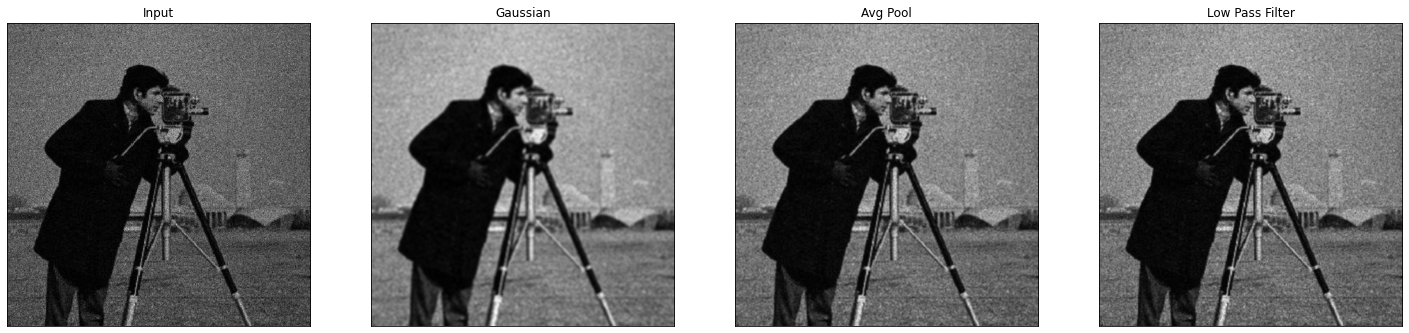

In [3]:
from scipy import fftpack
import scipy.stats as st


img = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

########################################################################################################################
# Gaussian Blur: 
def gkern(kernlen, nsig):
    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

def gaussian_blur(img, sigma):
    size = int(2 * np.ceil(3 * sigma))
    kern = gkern(size, sigma)
    sum_kern = np.sum(kern)
    gaussian_img = cv2.filter2D(src=img, ddepth = -1, kernel = kern / sum_kern)
    return gaussian_img

gaussian_img = gaussian_blur(img, 1)
########################################################################################################################
#Average Pooling:
# First way:
# def avg_pool(img, K, L):
#     M, N = img.shape
#     MK = M // K
#     NL = N // L
#     result = img[:MK * K, :NL * L].reshape(MK, K, NL, L).mean(axis=(1, 3))
#     return result

# avg_pool_img = avg_pool(img, 3, 3)
# also:
k = np.array([[1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9]])

avg_pool_img = cv2.filter2D(src = img, ddepth = -1, kernel = k)
########################################################################################################################

# Low pass filter:
def convolve2D(image, kernel, padding=1, strides=1):
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    for y in range(image.shape[1]):
        for x in range(image.shape[0]):
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()

    return output

k = gkern(3, 2)
filtered_image = convolve2D(img, k)
########################################################################################################################

plt.figure(figsize=(25, 15))  

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img.real, cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(avg_pool_img, cmap = 'gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;" dir="rtl">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 3
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و تبدیل‌های HSV و YCbCr را بر روی تصاویر اعمال کرده و در خروجی نشان دهید.
	   <br>
	</font>
</div>

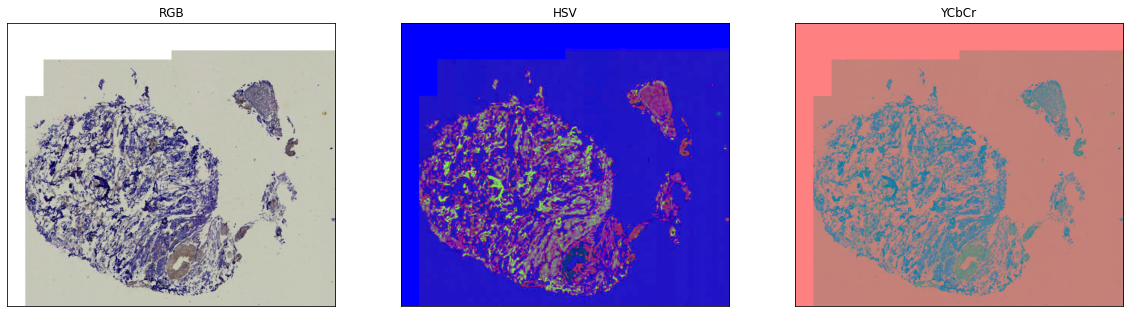

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


main_img = cv2.imread('3.jpg', 1)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)

hsv_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2HSV)
ycbcr_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2YCR_CB)


plt.figure(figsize=(20, 10))  

plt.subplot(131),plt.imshow(img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img, cmap = 'gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCbCr'), plt.xticks([]), plt.yticks([])
plt.show()


<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;" dir="rtl">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 4
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و پس از حذف نویزهای نمک و فلفلی از روی تصویر، بک‌گراند تصویر را حذف کنید. (دقت کنید که بک‌گراند شامل بخش‌های سفیدرنگ و بخش‌های کرمی‌رنگ می‌باشد.)
	   <br>
	</font>
</div>

(Text(0.5, 1.0, 'Final Image'), ([], []), ([], []))

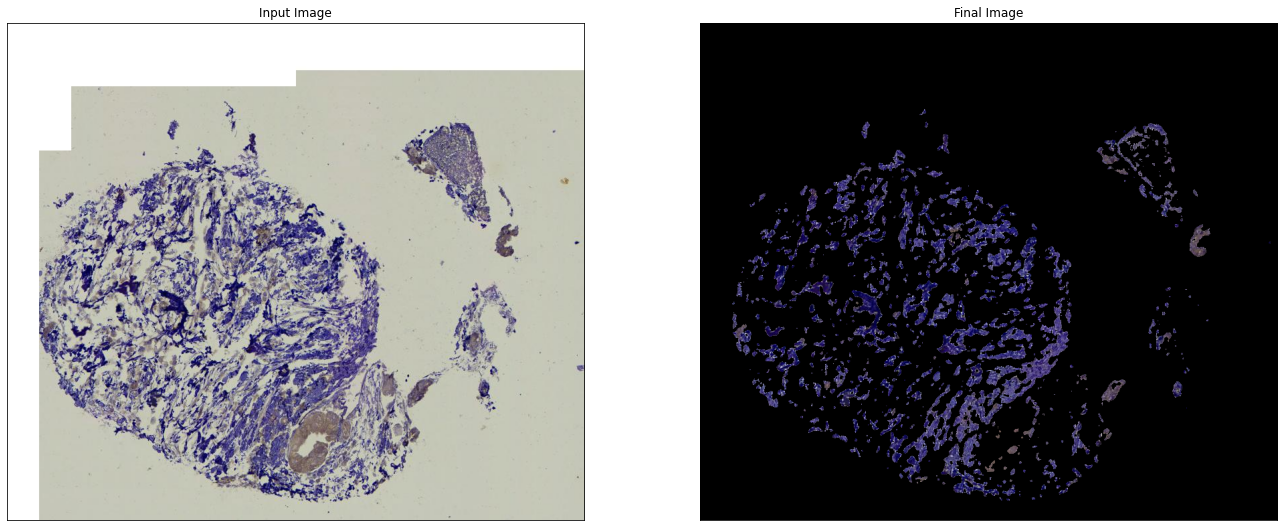

In [5]:
image = cv2.imread('3.jpg', 1).astype(np.uint8)
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = (cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)).astype(np.uint8)

gray = cv2.medianBlur(gray, 5)

rob,thresh = cv2.threshold(gray, int(image[:, :, 0].mean() - 82), int(image[:, :, 1].mean() - 82), 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(shape=(gray.shape), dtype=np.uint8)
cv2.drawContours(mask, contours, -1, (1,0,0), cv2.FILLED)   
mask = (~(mask == 1) * 1).astype(np.uint8)

removed_background = cv2.bitwise_and(image, image, mask=mask)
removed_background = cv2.cvtColor(removed_background, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(60, 60))  


plt.subplot(151),plt.imshow(rgb_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(removed_background, cmap = 'gray')
plt.title('Final Image'), plt.xticks([]), plt.yticks([])